In [1]:
%pip install sp

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sp: filename=sp-1.1.0-py3-none-any.whl size=7176 sha256=b5919a511c3fd38a5e0e28c5aaf506dd7a6ce1dc844fef7c105bf0fb46f679f3
  Stored in directory: c:\users\hoang\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\00\90\cb\46eb91a5f713c4eb09992c296424466699fc385189ab6f4262
Successfully built sp
Note: you may need to restart the kernel to use updated packages.


In [1]:
# slide 2
import sympy as sp

In [3]:
# khai báo biến
x = sp.Symbol('x')
# Nhập hàm từ bàn phím
expr_str = input("Nhập hàm cần tính đạo hàm: ")
# Chuyển đổi chuỗi thành biểu thức sympy
f = sp.sympify(expr_str)
# Nhập cấp dạo hàm
n = int(input("Nhập cấp đạo hàm n:"))
# tính đạo hàm cấp n
df_n = sp.diff(f,x,n)
# In kết quả
print(f"Đạo hàm cấp {n} của hàm {f} là: {df_n}")

Nhập hàm cần tính đạo hàm:  4**x + 5
Nhập cấp đạo hàm n: 1


Đạo hàm cấp 1 của hàm 4**x + 5 là: 4**x*log(4)


In [15]:
# slide 3

import sympy as sp

# khai báo biến
x = sp.Symbol('x')
# Nhập hàm từ bàn phím
expr_str = input("Nhập hàm cần xấp xỉ chuỗi taylor:")
# Nhập điểm mở rộng Taylor
t = float(input("Nhập điểm t mở rộng Taylor:"))
# Nhập cấp xấp xỉ Taylor
n = int(input("Nhập cấp xấp xỉ Taylor n:"))
# Khai báo chuỗi talor
taylor_series = sum(sp.diff(expr_str, x, i).subs(x, t) / sp.factorial(i) * (x - t)**i for i in range(n+1))
# In kết quả
print(f"Chuỗi Taylor cấp {n} của hàm {expr_str} tại điểm t={t} là: {taylor_series}")


Nhập hàm cần xấp xỉ chuỗi taylor: exp(x)
Nhập điểm t mở rộng Taylor: 0
Nhập cấp xấp xỉ Taylor n: 3


Chuỗi Taylor cấp 3 của hàm exp(x) tại điểm t=0.0 là: x**3/6 + x**2/2 + x + 1


In [ ]:
# 1 số case test có thể sử dụng:

"""
Trường hợp 1: Hàm exp(x) quanh điểm 0

Input:
Nhập hàm cần xấp xỉ chuỗi taylor: exp(x)
Nhập điểm t mở rộng Taylor: 0
Nhập cấp xấp xỉ Taylor n: 3


Trường hợp 2: Hàm sin(x) quanh điểm 0

Input:
Nhập hàm cần xấp xỉ chuỗi taylor: sin(x)
Nhập điểm t mở rộng Taylor: 0
Nhập cấp xấp xỉ Taylor n: 5


Trường hợp 3: Hàm log(x) (ln(x)) quanh điểm 1 
(Lưu ý: log(x) không xác định tại 0)

Input:
Nhập hàm cần xấp xỉ chuỗi taylor: log(x)
Nhập điểm t mở rộng Taylor: 1
Nhập cấp xấp xỉ Taylor n: 4
"""

Nhập số biến của hàm số:  2
Nhập hàm f(x1, x2):  x1**2 + x2**2



Đạo hàm riêng theo từng biến:
df/dx1 = 2*x1
df/dx2 = 2*x2

Điểm dừng:
Điểm 1: {x1: 0, x2: 0}

Phân loại điểm dừng:
Điểm 1: {x1: 0, x2: 0}, Loại: Cực tiểu


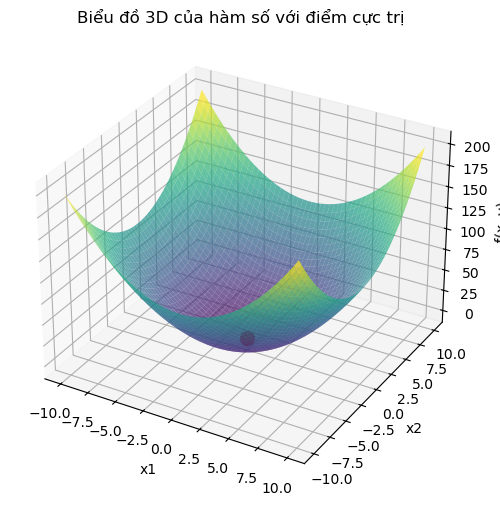

In [41]:
# slide 5 và 6
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Nhập số biến của hàm số
n = int(input("Nhập số biến của hàm số: "))

# Tạo danh sách biến
variables = sp.symbols(f'x1:{n+1}')

# Nhập hàm dưới dạng chuỗi
expr_str = input(f"Nhập hàm f({', '.join(map(str, variables))}): ")
expr = sp.sympify(expr_str) # chuyển chuỗi thành hình thức Sympy

# Tính đạo hàm riêng theo từng biến
gradient = [ sp.diff(expr, var) for var in variables ]

# Giải hệ phương trình Vf = 0 để tìm điểm dừng
critical_points = sp.solve(gradient, variables, dict=True)

print("\nĐạo hàm riêng theo từng biến:")
for var, grad in zip(variables, gradient):
    print(f"df/d{var} = {grad}")

print("\nĐiểm dừng:")
if not critical_points:
    print("Không có điểm dừng.")
else:
    for i, point in enumerate(critical_points, 1):
        print(f"Điểm {i}: {point}")

    # Xác định loại điểm cực trị
    H = sp.hessian(expr, variables) #Ma trận hessian
    print("\nPhân loại điểm dừng:") 

    for i, point in enumerate(critical_points, 1): 
        H_eval = H.subs(point) #Thay día trị điểm dừng vào hessian
        
        H_np = np.array(H_eval).astype(np.float64) #chuyển về ma trận số thực
        det_H = np.linalg.det(H_np)

        if det_H > 0: 
            if H_np[0, 0] > 0: 
                 point_type = "Cực tiểu" 
            else:
                 point_type = "Cực đại" 
        elif det_H < 0: 
             point_type = "Điểm yên ngựa" 
        else: 
             point_type = "Không xác định" 

        print(f"Điểm {i}: {point}, Loại: {point_type}") 
# Vẽ đồ thị nếu có
if n == 1:
    x = variables[0]
    f_lambdified = sp.lambdify(x, expr, 'numpy')
    
    x_vals = np.linspace(-10, 10, 400)
    y_vals = f_lambdified(x_vals)
    
    plt.plot(x_vals, y_vals, label=f'f({x}) = {expr}')

    # Vẽ điểm cực trị
    for point in critical_points:
        x_crit = float(point[x])
        y_crit = f_lambdified(x_crit)
        plt.scatter(x_crit, y_crit, color='red', marker='o', label='Cực trị')
    
    plt.xlabel(str(x))
    plt.ylabel('f(x)')
    plt.legend()
    plt.title("Biểu đồ 2D của hàm số")
    plt.grid()
    plt.show()

elif n == 2:
    x, y = variables[:2]
    f_lambdified = sp.lambdify((x, y), expr, 'numpy')
    x_vals = np.linspace(-10, 10, 50)
    y_vals = np.linspace(-10, 10, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_lambdified(X, Y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Vẽ điểm cực trị
    for point in critical_points:
        x_crit, y_crit = float(point[x]), float(point[y])
        z_crit = f_lambdified(x_crit, y_crit)
        ax.scatter(x_crit, y_crit, z_crit, color='red', s=100, marker='o')

    ax.set_xlabel(str(x))
    ax.set_ylabel(str(y))
    ax.set_zlabel('f(x, y)')
    ax.set_title('Biểu đồ 3D của hàm số với điểm cực trị')
    plt.show()

else:
    print("\nKhông thể trực quan hóa hàm số với nhiều hơn 2 biến.")

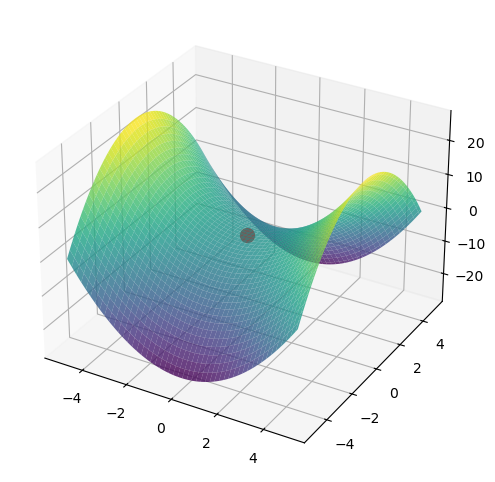

In [43]:
# slide 7 ảnh hình
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

z = x**2 - y**2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ mặt yên ngựa
surface = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8, linewidth=0)

ax.scatter(0, 0, 0, color='red', s=100)

plt.show()

In [47]:
# slide 8
import sympy as sp

def compute_derivatives():
     # Nhập số biến
     n = int(input("Nhập số biến n: "))

     # Khởi tạo biến x1, x2, ..., xn
     x = sp.symbols(f'x1:{n+1}')

     # Nhập hàm số dưới dạng chuỗi và chuyển thành biểu thức SymPy
     f_expr = input("Nhập hàm số f(x1, x2, ..., xn): ")
     f = sp.sympify(f_expr)

     # Tính Gradient
     grad = [sp.diff(f, xi) for xi in x]
     grad_vector = sp.Matrix(grad)

     #Tinh Hessian
     hessian = sp.Matrix([[sp.diff(grad[i], x[j]) for j in range(n)] for i in range(n)])


     print("\nGradient:")
     sp.pprint(grad_vector)

     print("\nHessian:")
     sp.pprint(hessian)
compute_derivatives()

Nhập số biến n:  2
Nhập hàm số f(x1, x2, ..., xn):  x1 ** 3 + 2*x1*x2 **2 - 5*x2 + 8



Gradient:
⎡    2       2⎤
⎢3⋅x₁  + 2⋅x₂ ⎥
⎢             ⎥
⎣ 4⋅x₁⋅x₂ - 5 ⎦

Hessian:
⎡6⋅x₁  4⋅x₂⎤
⎢          ⎥
⎣4⋅x₂  4⋅x₁⎦


In [49]:
# slide 9
import sympy as sp

def main():
    # Bước 1: Nhập số dòng (m) và số cột (n)
    m = int(input("Nhập số dòng m: "))
    n = int(input("Nhập số cột n: "))

    # Bước 2: Nhập tên biến cho từng phần tử ma trận X
    # Tạo một cấu trúc lưu tên biến cho mỗi vị trí (i, j)
    variable_names = []
    for i in range(m):
        row_names = []
        for j in range(n):
            var_name = input(f"Nhập tên biến cho phần tử X[{i}][{j}]: ")
            row_names.append(var_name)
        variable_names.append(row_names)

    # Tạo dict để ánh xạ "tên biến" -> "biến Symbol trong Sympy"
    var_dict = {}
    for i in range(m):
        for j in range(n):
            name = variable_names[i][j]
            var_dict[name] = sp.Symbol(name, real=True)

    # Xây dựng ma trận Sympy X từ các biến Symbol
    X_symbols = []
    for i in range(m):
        row = []
        for j in range(n):
             row.append(var_dict[variable_names[i][j]])
        X_symbols.append(row)
    X = sp.Matrix(X_symbols)

    # Bước 3: Nhập biểu thức hàm f(X)
    print("\nLưu ý: Hãy dùng đúng tên biến bạn vừa đặt cho các phần tử.\n")
    f_str = input("Nhập biểu thức hàm f(X): ")

    # Dùng sympify với var_dict để chuyển f_str thành biểu thức Sympy
    f_expr = sp.sympify(f_str, locals=var_dict)

    # Bước 4: Tính ma trận đạo hàm (gradient) ∂f/∂X
    gradient_matrix = sp.zeros(m, n)
    for i in range(m):
        for j in range(n):
            gradient_matrix[i, j] = sp.diff(f_expr, X[i, j])

    # Bước 5: In kết quả
    print("\n--- Kết quả ---")
    print("\nMa trận X:")
    sp.pprint(X)
    print("\nHàm f(X):")
    sp.pprint(f_expr)
    print("\nĐạo hàm (gradient) ∂f/∂X:")
    sp.pprint(gradient_matrix)


if __name__ == "__main__":
    main()

Nhập số dòng m:  2
Nhập số cột n:  2
Nhập tên biến cho phần tử X[0][0]:  a
Nhập tên biến cho phần tử X[0][1]:  b
Nhập tên biến cho phần tử X[1][0]:  c
Nhập tên biến cho phần tử X[1][1]:  d



Lưu ý: Hãy dùng đúng tên biến bạn vừa đặt cho các phần tử.



Nhập biểu thức hàm f(X):  a**2 + b*c - d



--- Kết quả ---

Ma trận X:
⎡a  b⎤
⎢    ⎥
⎣c  d⎦

Hàm f(X):
 2          
a  + b⋅c - d

Đạo hàm (gradient) ∂f/∂X:
⎡2⋅a  c ⎤
⎢       ⎥
⎣ b   -1⎦


In [51]:
# slide 10
import sympy as sp

def main():
    # Bước 1: Nhập số chiều đầu vào m
    m = int(input("Nhập số chiều đầu vào m: "))
    # Tạo các biến x1, x2, ..., x_m
    x_symbols = sp.symbols('x1:' + str(m+1), real=True)
    
    # Bước 2: Nhập số chiều đầu ra n
    n = int(input("Nhập số chiều đầu ra n: "))
    
    print(f"\nCó {m} biến: {x_symbols}")
    print(f"Cần nhập {n} thành phần f_1, f_2, ..., f_{n} (mỗi thành phần là 1 hàm R^{m} -> R).")
    print("Ví dụ: x1 + x2, x1*x2, x1 - x2,...")
    
    # Bước 3: Nhập các thành phần f_j
    f_list = []
    for j in range(n):
        f_str = input(f"Nhập biểu thức cho f_{j+1}(x1, x2, ..., x{m}): ")
        # ensure the expression uses the correct variable names
        local_dict = {f'x{i+1}': x_symbols[i] for i in range(m)}
        f_expr = sp.sympify(f_str, locals=local_dict)
        f_list.append(f_expr)
    
    # Xây dựng vector-hàm f(x)
    f_vector = sp.Matrix(f_list)
    
    # Bước 4: Tính ma trận Jacobian (kích thước n x m)
    jacobian_matrix = sp.zeros(n, m)
    for i in range(n):
        for j in range(m):
            jacobian_matrix[i, j] = sp.diff(f_list[i], x_symbols[j])
    
    # Bước 5: In kết quả
    print("\n--- Vector-hàm f(x) ---")
    sp.pprint(f_vector)
    
    print("\n--- Ma trận Jacobian (n x m) ---")
    sp.pprint(jacobian_matrix)

if __name__ == "__main__":
    main()

Nhập số chiều đầu vào m:  2
Nhập số chiều đầu ra n:  2



Có 2 biến: (x1, x2)
Cần nhập 2 thành phần f_1, f_2, ..., f_2 (mỗi thành phần là 1 hàm R^2 -> R).
Ví dụ: x1 + x2, x1*x2, x1 - x2,...


Nhập biểu thức cho f_1(x1, x2, ..., x2):  x1+x2
Nhập biểu thức cho f_2(x1, x2, ..., x2):  x1*x2



--- Vector-hàm f(x) ---
⎡x₁ + x₂⎤
⎢       ⎥
⎣ x₁⋅x₂ ⎦

--- Ma trận Jacobian (n x m) ---
⎡1   1 ⎤
⎢      ⎥
⎣x₂  x₁⎦
